In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/Users/omesh/Desktop/VS_Code_Projects/TENSORFLOW-TEST/MSFT.csv')

In [8]:
df

,Date,Close/Last,Volume,Open,High,Low
0,12/13/2024,$447.27,20177830,$448.435,$451.43,$445.58
1,12/12/2024,$449.56,20834780,$449.11,$456.1648,$449.11
2,12/11/2024,$448.99,19200210,$444.05,$450.35,$444.05
3,12/10/2024,$443.33,18469460,$444.39,$449.62,$441.60
4,12/09/2024,$446.02,19144390,$442.60,$448.33,$440.50
...,...,...,...,...,...,...
2510,12/23/2014,$48.45,23654190,$48.37,$48.80,$48.13
2511,12/22/2014,$47.98,26561880,$47.78,$48.12,$47.71
2512,12/19/2014,$47.66,64504160,$47.63,$48.10,$47.17
2513,12/18/2014,$47.52,40031480,$46.58,$47.52,$46.3386


In [9]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow has access to the following devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow version: 2.13.0


In [10]:
df = df[['Date', 'Close/Last']]

df

,Date,Close/Last
0,12/13/2024,$447.27
1,12/12/2024,$449.56
2,12/11/2024,$448.99
3,12/10/2024,$443.33
4,12/09/2024,$446.02
...,...,...
2510,12/23/2014,$48.45
2511,12/22/2014,$47.98
2512,12/19/2014,$47.66
2513,12/18/2014,$47.52


In [11]:
df['Date']

0       12/13/2024
1       12/12/2024
2       12/11/2024
3       12/10/2024
4       12/09/2024
           ...    
2510    12/23/2014
2511    12/22/2014
2512    12/19/2014
2513    12/18/2014
2514    12/17/2014
Name: Date, Length: 2515, dtype: object

In [12]:
import datetime

In [13]:
def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

def dollarto_to_int(s):
  split = s.split('$')
  dol = float(split[1])
  return dol

In [14]:
dolcheck = dollarto_to_int('$444.85')
dolcheck

444.85

In [15]:
df

,Date,Close/Last
0,12/13/2024,$447.27
1,12/12/2024,$449.56
2,12/11/2024,$448.99
3,12/10/2024,$443.33
4,12/09/2024,$446.02
...,...,...
2510,12/23/2014,$48.45
2511,12/22/2014,$47.98
2512,12/19/2014,$47.66
2513,12/18/2014,$47.52


In [16]:
df['Close/Last'] = df['Close/Last'].apply(dollarto_to_int)
df['Close/Last']

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/q1/p92t7zv102j55m23tsxl1q000000gn/T/ipykernel_20161/336742877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close/Last'] = df['Close/Last'].apply(dollarto_to_int)
/var/folders/q1/p92t7zv102j55m23tsxl1q000000gn/T/ipykernel_20161/336742877.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2024-12-13
1      2024-12-12
2      2024-12-11
3      2024-12-10
4      2024-12-09
          ...    
2510   2014-12-23
2511   2014-12-22
2512   2014-12-19
2513   2014-12-18
2514   2014-12-17
Name: Date, Length: 2515, dtype: datetime64[ns]

In [17]:

df.index = df.pop('Date')

In [18]:
df = df.sort_index(ascending=True)
df

,Close/Last
Date,
2014-12-17,45.74
2014-12-18,47.52
2014-12-19,47.66
2014-12-22,47.98
2014-12-23,48.45
...,...
2024-12-09,446.02
2024-12-10,443.33
2024-12-11,448.99


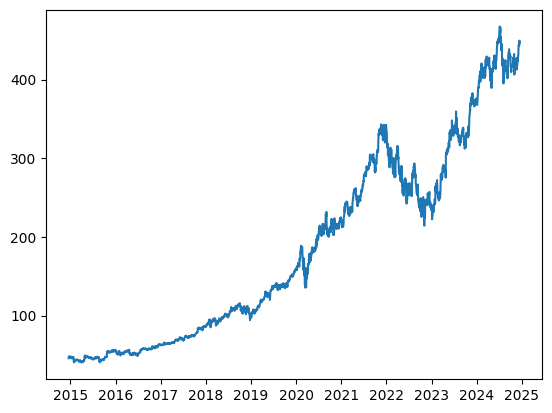

In [19]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close/Last'])

In [20]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close/Last'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '12/22/2014', 
                                '12/10/2024', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2014-12-22,45.74,47.52,47.66,47.98
1,2014-12-23,47.52,47.66,47.98,48.45
2,2014-12-24,47.66,47.98,48.45,48.14
3,2014-12-26,47.98,48.45,48.14,47.88
4,2014-12-29,48.45,48.14,47.88,47.45
...,...,...,...,...,...
2504,2024-12-04,423.46,430.98,431.20,437.42
2505,2024-12-05,430.98,431.20,437.42,442.62
2506,2024-12-06,431.20,437.42,442.62,443.57
2507,2024-12-09,437.42,442.62,443.57,446.02


In [21]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2509,), (2509, 3, 1), (2509,))

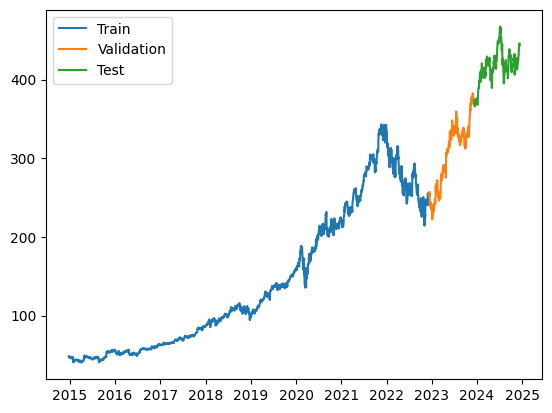

In [22]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import layers

'''model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)'''

"model = Sequential([layers.Input((3, 1)),\n                    layers.LSTM(64),\n                    layers.Dense(32, activation='relu'),\n                    layers.Dense(32, activation='relu'),\n                    layers.Dense(1)])\n\nmodel.compile(loss='mse', \n              optimizer=Adam(learning_rate=0.001),\n              metrics=['mean_absolute_error'])\n\nmodel.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)"

In [40]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(128),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])


In [41]:
model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
print("kernel dead after compile")


kernel dead after compile


In [42]:
print("here the kernel stop happened before")


here the kernel stop happened before


In [43]:
print("kernel before model fit")
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)
print("kernel after model fit")

kernel before model fit
Epoch 1/100


2024-12-17 20:00:08.750899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-17 20:00:08.897318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-17 20:00:09.117217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 2s 18ms/step - loss: 23700.3711 - mean_absolute_error: 123.4846 - val_loss: 60679.6211 - val_mean_absolute_error: 242.4204
Epoch 2/100


2024-12-17 20:00:10.330599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-17 20:00:10.386868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 10ms/step - loss: 6424.6499 - mean_absolute_error: 60.5686 - val_loss: 11045.4521 - val_mean_absolute_error: 96.9433
Epoch 3/100
63/63 [==============================] - 1s 10ms/step - loss: 274.6989 - mean_absolute_error: 6.9171 - val_loss: 868.5914 - val_mean_absolute_error: 22.1300
Epoch 4/100
63/63 [==============================] - 1s 10ms/step - loss: 28.8594 - mean_absolute_error: 3.2166 - val_loss: 386.0670 - val_mean_absolute_error: 13.6203
Epoch 5/100
63/63 [==============================] - 1s 10ms/step - loss: 17.9921 - mean_absolute_error: 2.6068 - val_loss: 254.7451 - val_mean_absolute_error: 10.6573
Epoch 6/100
63/63 [==============================] - 1s 10ms/step - loss: 16.0216 - mean_absolute_error: 2.5624 - val_loss: 188.5175 - val_mean_absolute_error: 8.5761
Epoch 7/100
63/63 [==============================] - 1s 10ms/step - loss: 16.8623 - mean_absolute_error: 2.5243 - val_loss: 199.3103 - val_mean_absolute_error: 9.9838


2024-12-17 19:31:30.967730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-17 19:31:31.018820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 5ms/step


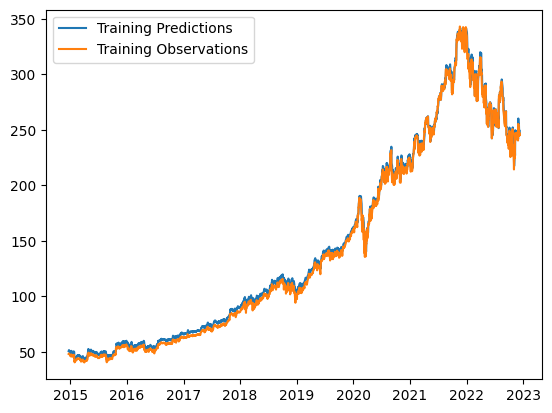

In [34]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

8/8 [==============================] - 0s 6ms/step


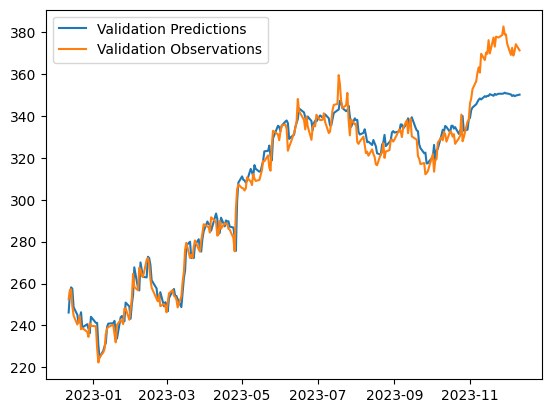

In [35]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

8/8 [==============================] - 0s 3ms/step


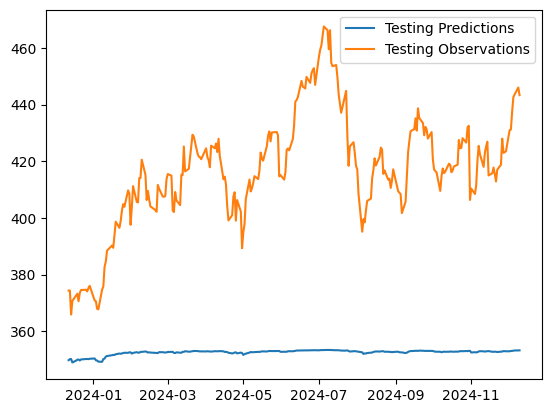

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

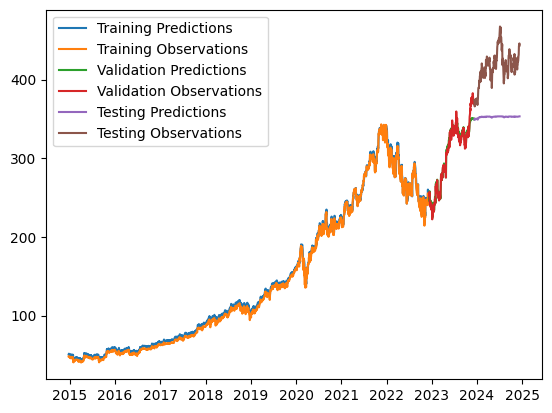

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [38]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 14ms/step


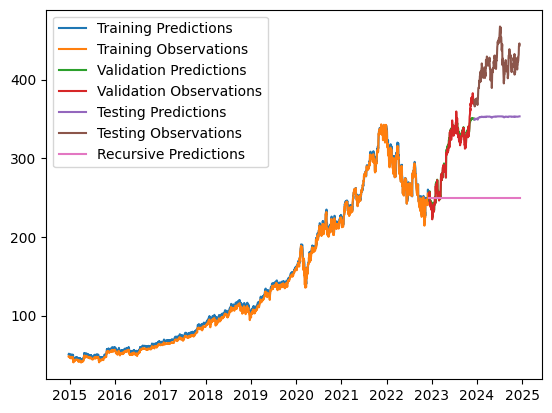

In [39]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])